In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import util as util


In [3]:
df=pd.read_csv("C://Users//HP//Downloads//output_data.csv")
df

,Timestamp,DeviceID,OC,OT,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,1878,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2286,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,2292,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2478,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2300,2778
...,...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,2312,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2296,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2076,2478


In [4]:
df=util.drop_values(df,col_list=["OC","OT","PC"])
df

,Timestamp,DeviceID,OC,OT,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,1878,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2286,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,2292,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2478,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2300,2778
...,...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,2312,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2296,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2076,2478


In [5]:
uni=5
unique_device, device_list = util.make_deviceid_dict(df, uni)

In [6]:
print(unique_device)

['e77b973a-b7c9-4113-8598-4e85be9a8b34', '19083212-f248-48f5-b7c2-1902d366da74', '26fef3fe-5c95-49b3-aff3-737124c6244b', 'db18c473-1dc3-4d2a-b6b9-60db12b71009', '6aa15284-a078-4f25-b1b9-7045ce071b47']


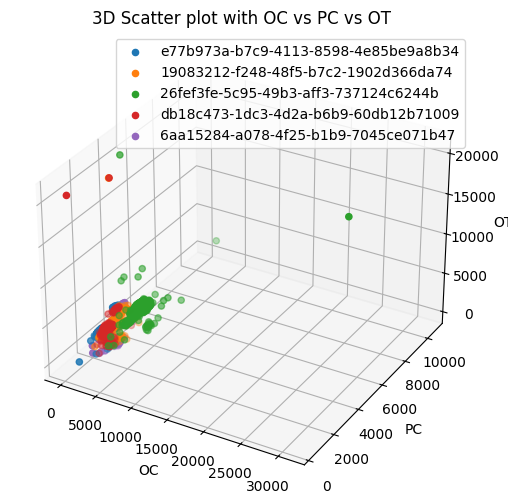

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def matplotlib_plot(df, unique_device):
    fig = plt.figure(figsize=(18, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for device in unique_device[:5]:  # Limiting to the first 5 devices
        sub_data_frame = df[df["DeviceID"] == device]
        ax.scatter(sub_data_frame["OC"], sub_data_frame["PC"], sub_data_frame["OT"], label=device)
    
    ax.set_xlabel("OC")
    ax.set_ylabel("PC")
    ax.set_zlabel("OT")
    ax.set_title("3D Scatter plot with OC vs PC vs OT")
    ax.legend()
    plt.show()

matplotlib_plot(df, unique_device)



In [10]:
import plotly.express as px

def plotly_plot(df, unique_device):
    # Limiting to the first 5 devices for visualization
    filtered_df = df[df["DeviceID"].isin(unique_device[:5])]
    
    fig = px.scatter_3d(
        filtered_df,
        x="OC",
        y="PC",
        z="OT",
        color="DeviceID",
        labels={"OC": "OC", "PC": "PC", "OT": "OT"},
        title="3D Scatter plot with OC vs PC vs OT"
    )
    
    fig.show()

plotly_plot(df, unique_device)



In [11]:
df=df[df["DeviceID"].isin(unique_device)]
df


,Timestamp,DeviceID,OC,OT,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,1878,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2286,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,2292,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2478,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2300,2778
...,...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,2312,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2296,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2076,2478


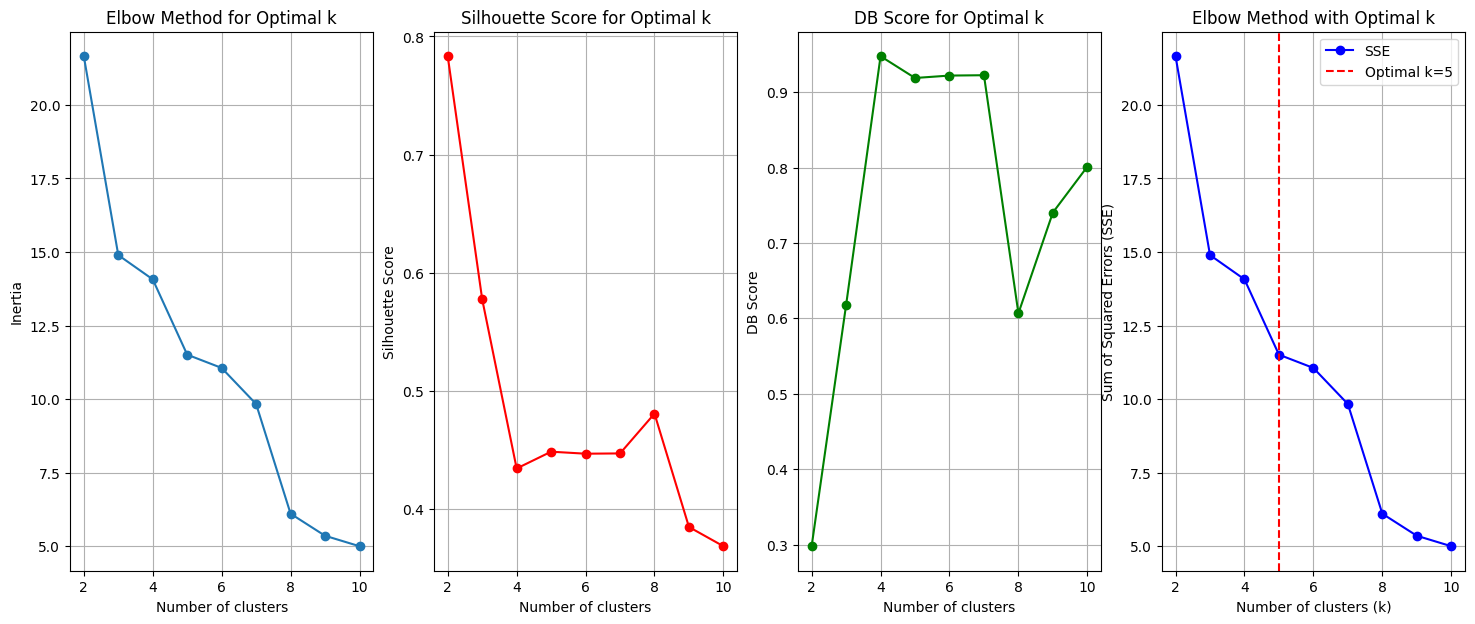

In [12]:
from util import k_score
data_to_cluster = df[["OC","OT","PC",]]
optimal_v=k_score(data_to_cluster)

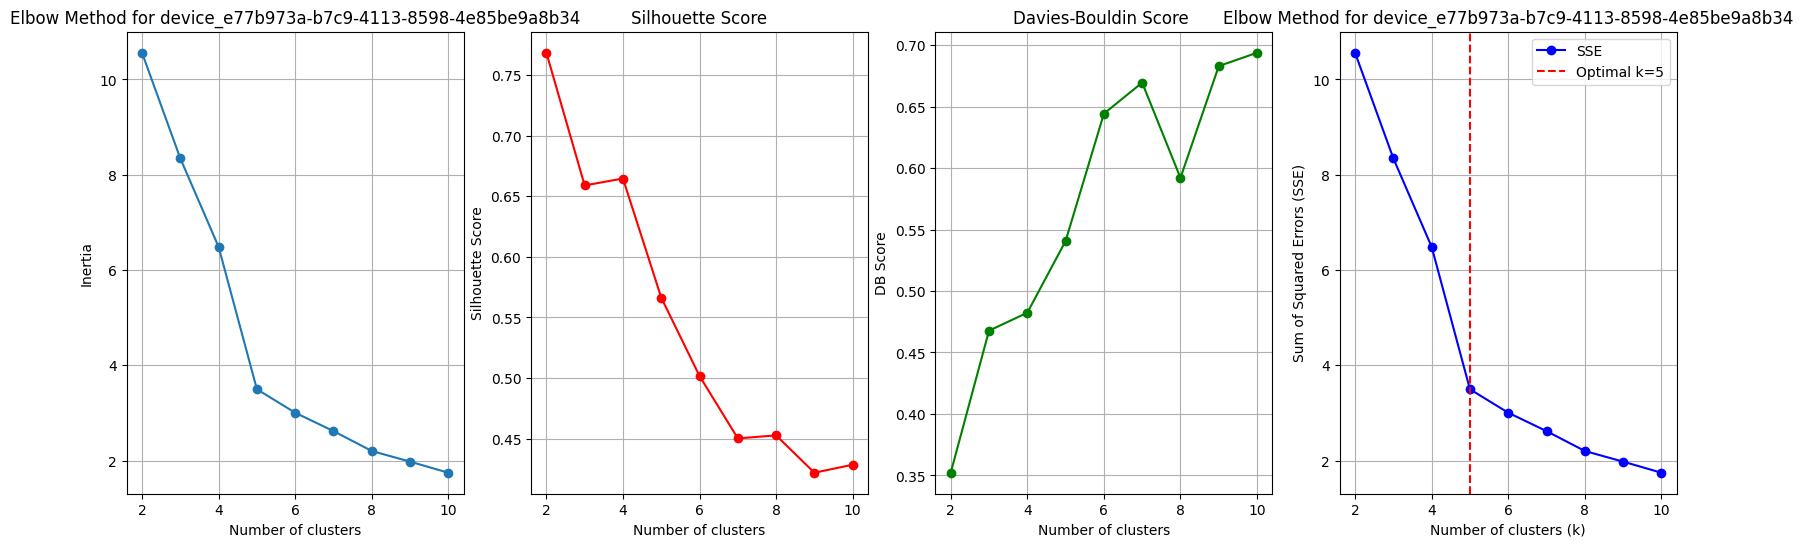

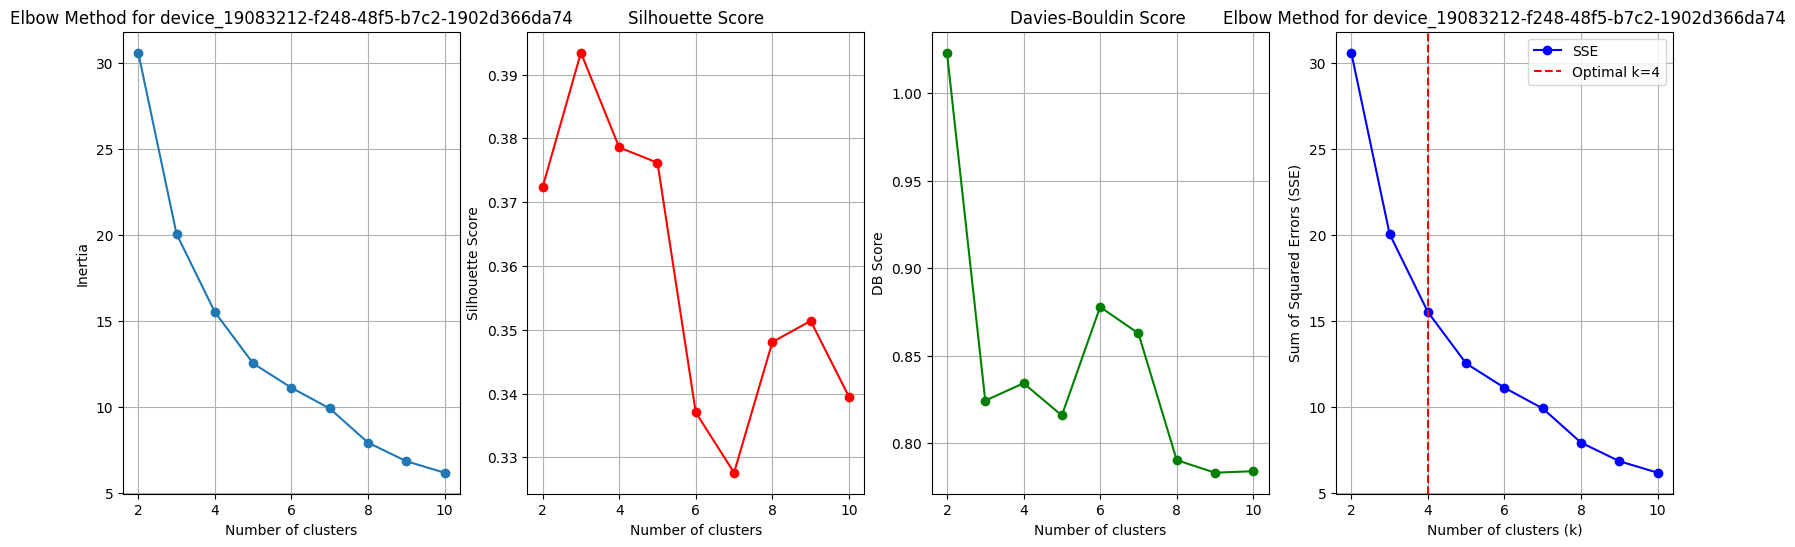

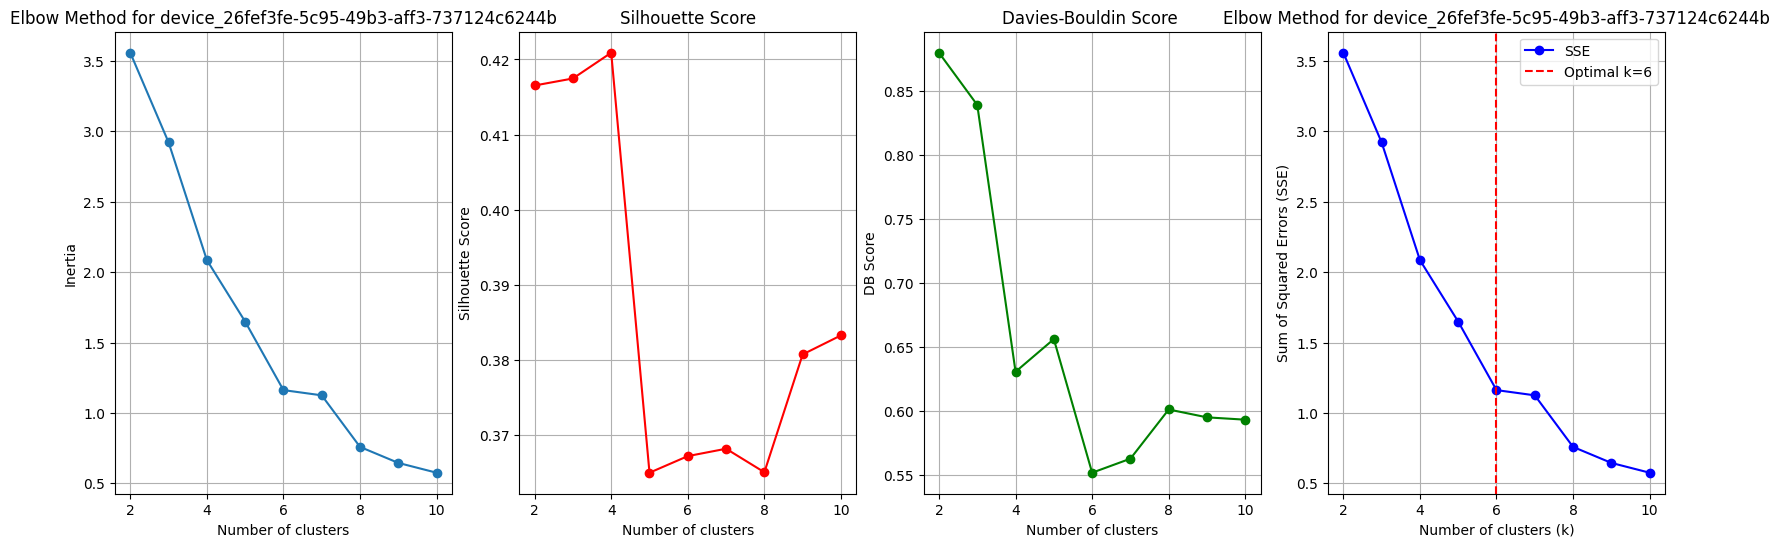

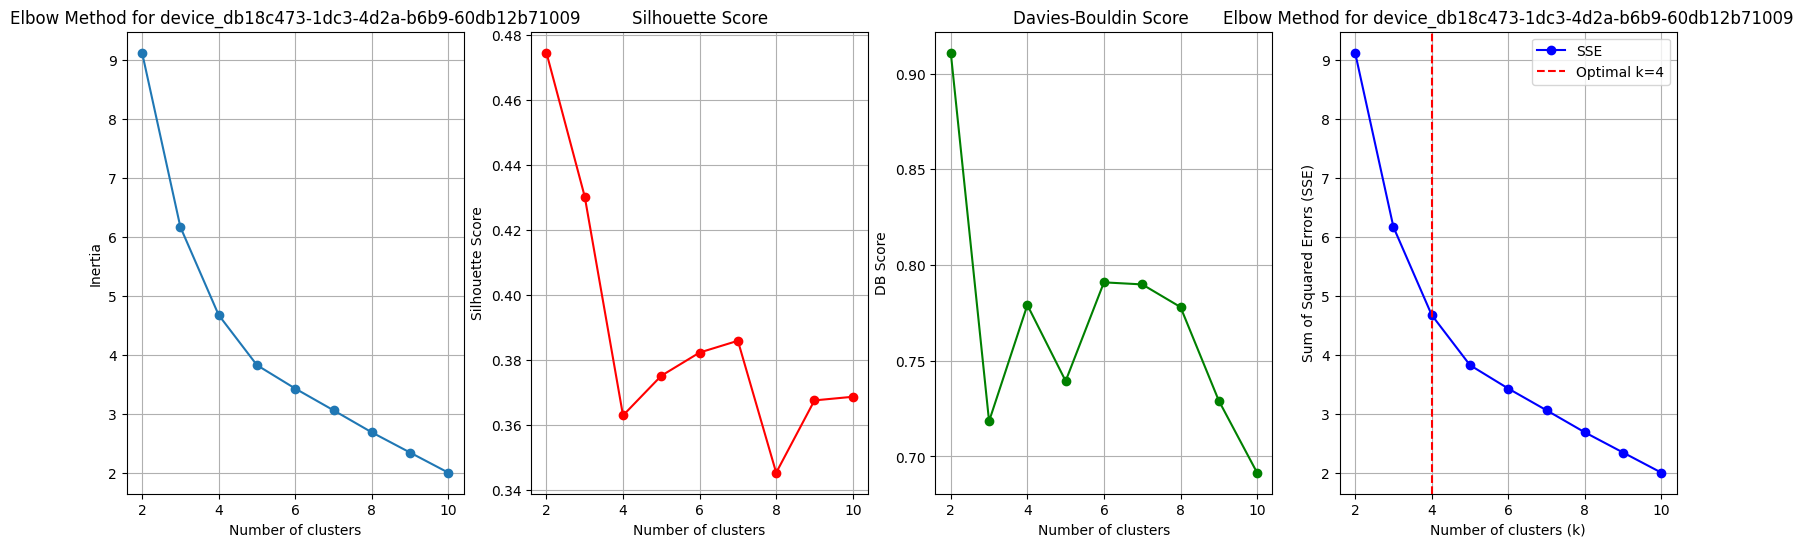

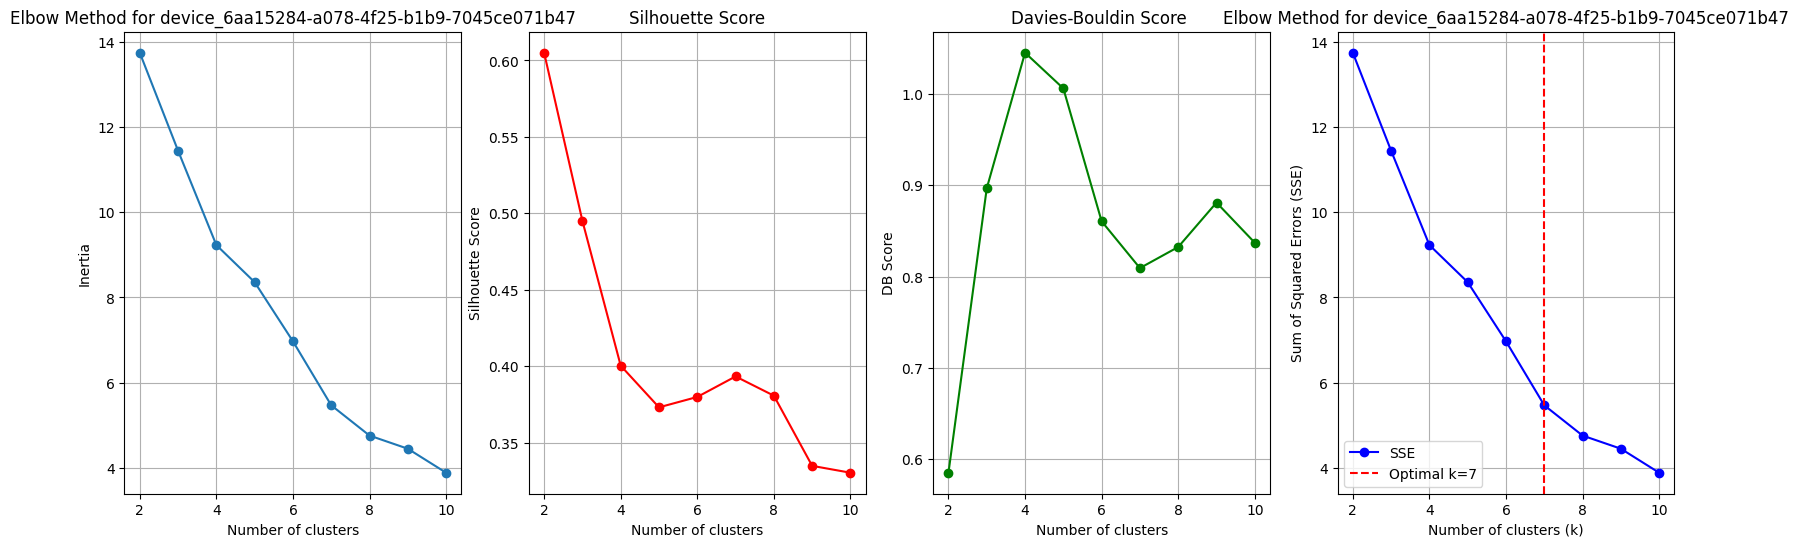

{'device_e77b973a-b7c9-4113-8598-4e85be9a8b34': np.int64(5), 'device_19083212-f248-48f5-b7c2-1902d366da74': np.int64(4), 'device_26fef3fe-5c95-49b3-aff3-737124c6244b': np.int64(6), 'device_db18c473-1dc3-4d2a-b6b9-60db12b71009': np.int64(4), 'device_6aa15284-a078-4f25-b1b9-7045ce071b47': np.int64(7)}


In [13]:
from util import k_score_each_device
device_feature=["OC", "PC"]
kscore_dict= util.k_score_each_device( device_list,device_feature)
print(kscore_dict)

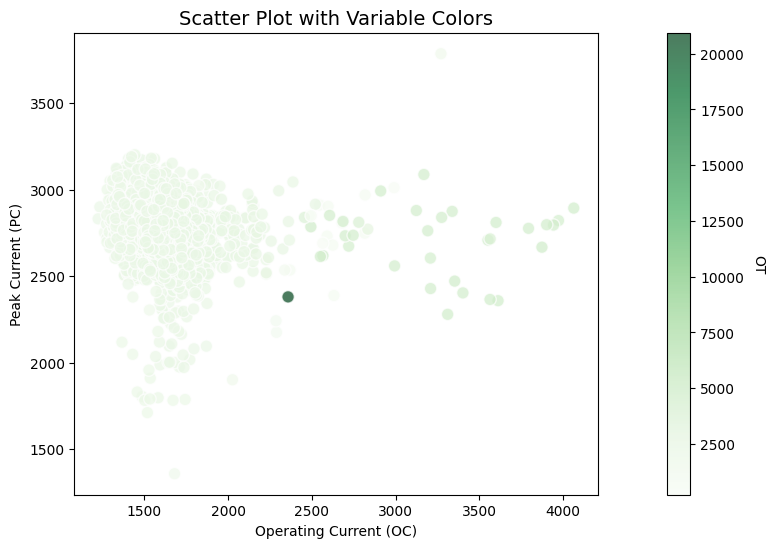

In [9]:
X = dd["OC"]
Y = dd["PC"]
Z = dd["OT"]

fig, ax = plt.subplots(figsize=(9, 6))


scatter = ax.scatter(X, Y, c=Z, cmap='Greens', s=80, alpha=0.7, edgecolors='w')

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('OT', rotation=270, labelpad=15)

ax.set_xlabel('Operating Current (OC)')
ax.set_ylabel('Peak Current (PC)')
ax.set_title('Scatter Plot with Variable Colors', size=14)

plt.show()

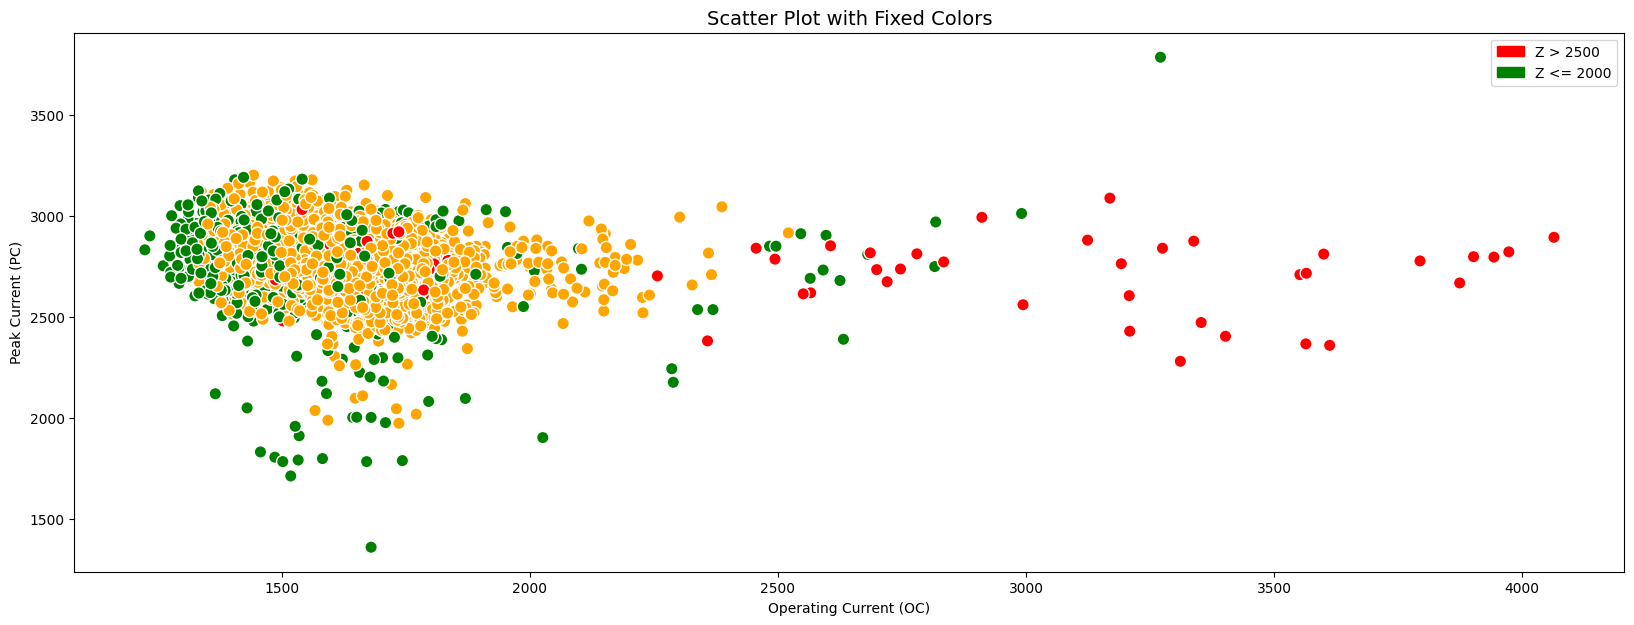

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
X = dd["OC"]
Y = dd["PC"]
Z = dd["OT"]

# Define color ranges or categories (example)
colors = np.where(Z > 2500, 'red', np.where(Z > 2087, 'orange', 'green'))

fig, ax = plt.subplots(figsize=(20,7))

# Scatter plot with specific colors
scatter = ax.scatter(X, Y, c=colors, s=80, edgecolors='w')

# Customizing the plot
ax.set_xlabel('Operating Current (OC)')
ax.set_ylabel('Peak Current (PC)')
ax.set_title('Scatter Plot with Fixed Colors', size=14)

# Creating a legend manually
import matplotlib.patches as mpatches
legend_elements = [mpatches.Patch(color='red', label='Z > 2500'),
                   mpatches.Patch(color='green', label='Z <= 2000')]
ax.legend(handles=legend_elements, loc='best')

plt.show()


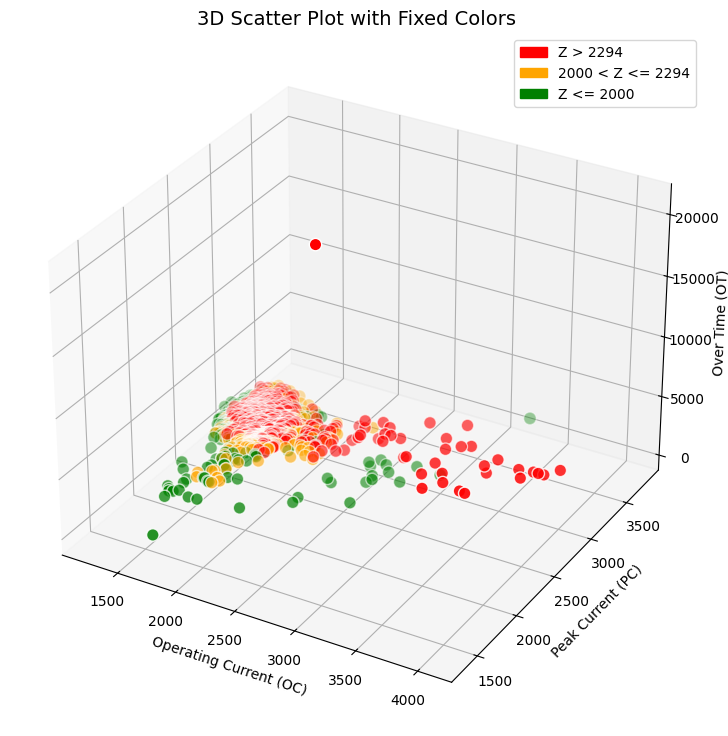

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data (replace with your actual data)
X = dd["OC"]
Y = dd["PC"]
Z = dd["OT"]

# Define color ranges or categories (example)
colors = np.where(Z > 2294, 'red', np.where(Z > 2087, 'orange', 'green'))

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot with specific colors
scatter = ax.scatter(X, Y, Z, c=colors, s=80, edgecolors='w')

# Customizing the plot
ax.set_xlabel('Operating Current (OC)')
ax.set_ylabel('Peak Current (PC)')
ax.set_zlabel('Over Time (OT)')
ax.set_title('3D Scatter Plot with Fixed Colors', size=14)

# Creating a legend manually
import matplotlib.patches as mpatches
legend_elements = [mpatches.Patch(color='red', label='Z > 2294'),
                   mpatches.Patch(color='orange', label='2000 < Z <= 2294'),
                   mpatches.Patch(color='green', label='Z <= 2000')]
ax.legend(handles=legend_elements, loc='best')

plt.show()


,Timestamp,OC,OT,PC
count,4.506000e+03,4506.000000,4506.000000,4506.000000
mean,1.719851e+12,1618.381269,2226.992455,2759.991789
std,1.530572e+09,221.686281,384.994465,150.701988
min,1.717180e+12,1224.000000,220.000000,1358.000000
25%,1.718506e+12,1473.000000,2087.000000,2688.000000
50%,1.719857e+12,1613.000000,2275.000000,2762.000000
75%,1.721206e+12,1718.000000,2296.000000,2846.000000
max,1.722450e+12,4064.000000,20943.000000,3785.000000


,Timestamp,DeviceID,OC,OT,PC
50022,1721821240572,19083212-f248-48f5-b7c2-1902d366da74,2358,20943,2380


,Timestamp,DeviceID,OC,OT,PC
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2286,2756
5,1717180937101,19083212-f248-48f5-b7c2-1902d366da74,1397,2075,2758
23,1717181478541,19083212-f248-48f5-b7c2-1902d366da74,1631,2085,2451
25,1717181491681,19083212-f248-48f5-b7c2-1902d366da74,1420,2092,2846
39,1717182082966,19083212-f248-48f5-b7c2-1902d366da74,1705,2286,2527
...,...,...,...,...,...
56315,1722446277485,19083212-f248-48f5-b7c2-1902d366da74,1536,2280,2529
56323,1722448187540,19083212-f248-48f5-b7c2-1902d366da74,1583,2123,2720
56339,1722448975154,19083212-f248-48f5-b7c2-1902d366da74,1556,2085,2884
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821


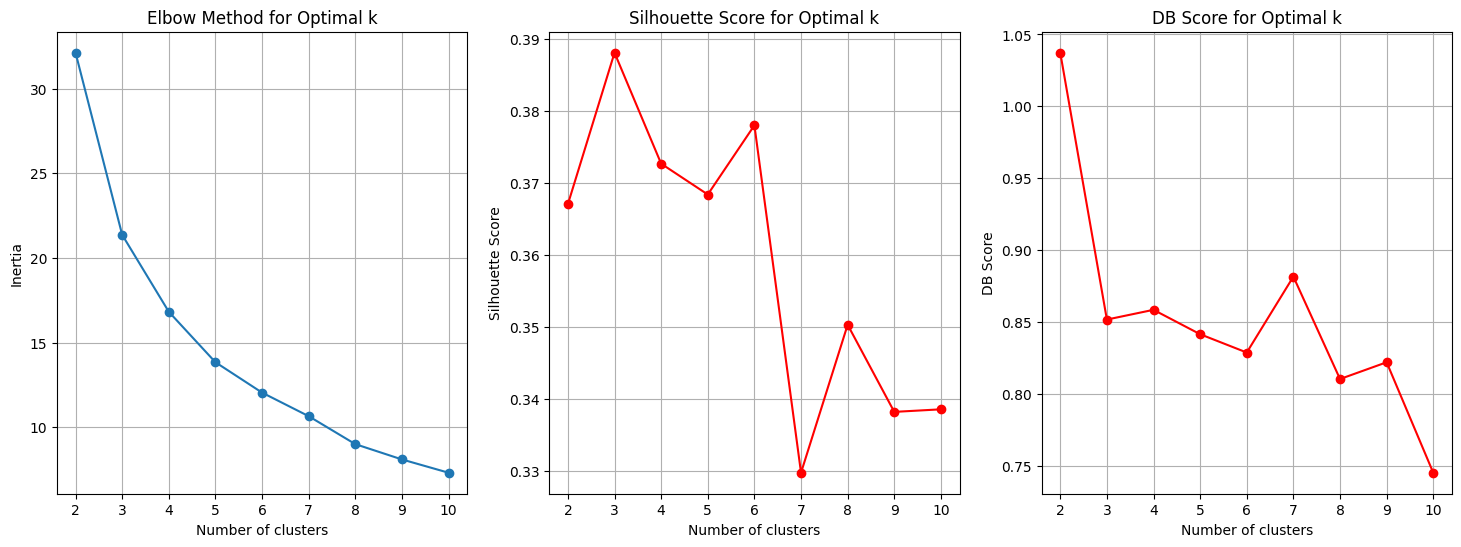

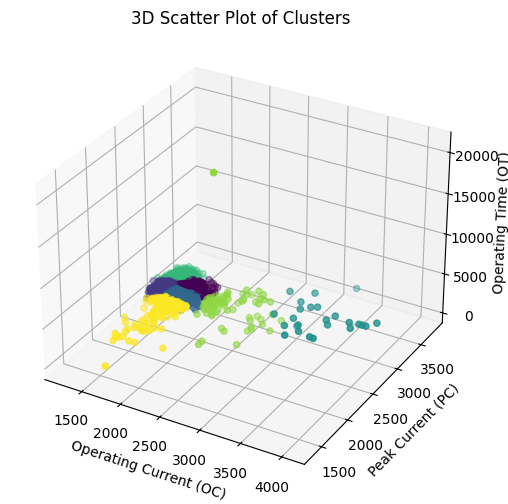

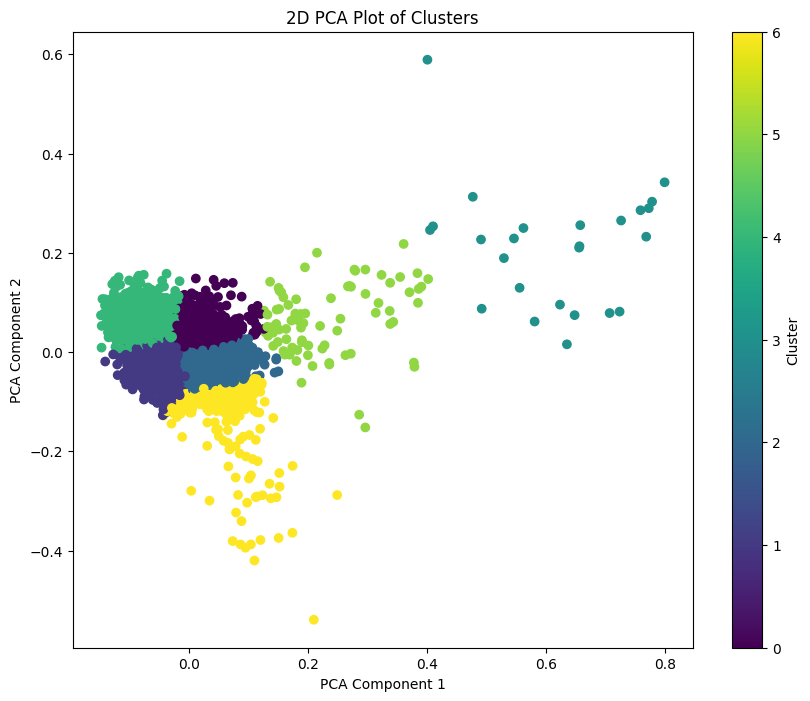

Cluster centroids:
Cluster 1: OC=1717.361111111111, PC=2834.22337962963, OT=2261.5
Cluster 2: OC=1451.2022090059475, PC=2751.5760407816483, OT=2137.7799490229395
Cluster 3: OC=1702.9052969502409, PC=2686.46227929374, OT=2266.750401284109
Cluster 4: OC=3447.64, PC=2747.12, OT=4182.400000000001
Cluster 5: OC=1474.3835263835263, PC=2947.6949806949806, OT=2178.05148005148
Cluster 6: OC=2294.5875, PC=2721.675, OT=2513.8875000000003
Cluster 7: OC=1671.7715133531158, PC=2448.2077151335307, OT=2202.780415430267


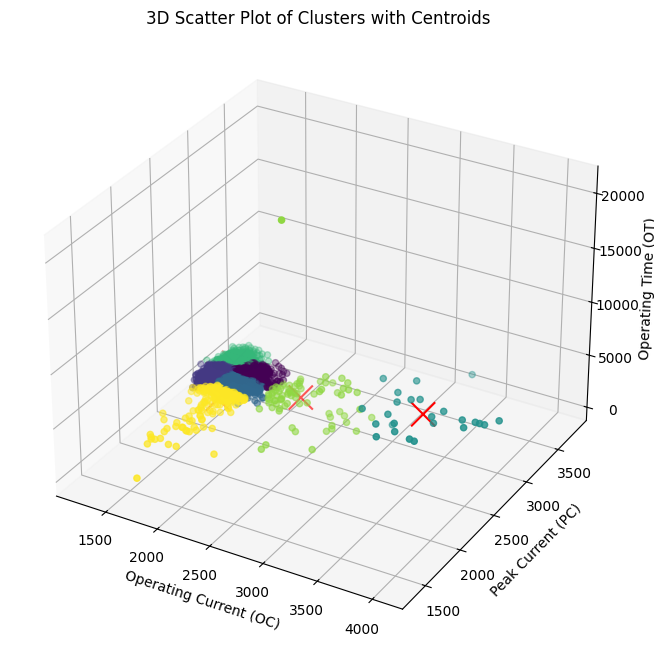